[View in Colaboratory](https://colab.research.google.com/github/kanokwan1994/AUAISummer2018/blob/master/malaria.ipynb)

##malaria

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Preparing to unpack .../04-gnupg_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg (2.1.15-1ubuntu8.1) over (2.1.15-1ubuntu8) ...
Preparing to unpack .../05-gnupg-agent_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg-agent (2.1.15-1ubuntu8

Setting up iso-codes (3.75-1) ...
Setting up distro-info-data (0.36ubuntu0.2) ...
Setting up python-pycurl (7.43.0-2build2) ...
Setting up lsb-release (9.20160110ubuntu5) ...
Setting up libgirepository-1.0-1:amd64 (1.54.1-1) ...
Setting up libkmod2:amd64 (24-1ubuntu2) ...
Setting up gir1.2-glib-2.0:amd64 (1.54.1-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up gnupg-agent (2.1.15-1ubuntu8.1) ...
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to d

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving malaria.csv to malaria.csv


In [4]:
ls

datalab/  malaria.csv


In [0]:
data = pd.read_csv('malaria.csv');

In [6]:
print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()


 	 The data frame has 13464 rows and 41 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 41 columns):
Country                                   13464 non-null object
GAUL_Admin1                               13364 non-null object
GAUL_Admin2                               13075 non-null object
Full_Name                                 13464 non-null object
Lat                                       13330 non-null float64
Long                                      13330 non-null float64
LatLong_Source                            13331 non-null object
YeStart                                   13464 non-null int64
YeEnd                                     13464 non-null int64
An gambiae_complex                        11596 non-null object
An gambiae ss                             3990 non-null object
SS M Form (An colluzzi or Mopti forms)    1331 non-null object
SS S Form (savanah or Bamako forms)       1575 non-null object
An arabien

In [7]:
data.head(3)

,Country,GAUL_Admin1,GAUL_Admin2,Full_Name,Lat,Long,LatLong_Source,YeStart,YeEnd,An gambiae_complex,...,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae,Sampling_Methods,Species_Identification,Other sib species names,Other Anopheline species,Source_Title
0,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.362,Encarta,1967,1967,Y,...,NaN,NaN,NaN,NaN,"Adults, Larvae","HLC, HBC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...
1,Angola,Bengo,Dande,Boa Vista,-8.5990,13.566,Encarta,1987,1987,Y,...,NaN,NaN,NaN,NaN,"Adults, Larvae","PSC, LC",M,NaN,NaN,Ramos L (1988). Memorandum sent to Director Ge...
2,Angola,Bengo,Dande,Cabungo,-8.5667,13.500,Other,2002,2002,Y,...,NaN,NaN,NaN,NaN,Adults,"IR, Bednet traps","M, PCR",NaN,NaN,"Calzetta M, Santolamazza F, Carrara GC, Cani P..."


In [0]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 39 columns):
GAUL_Admin1                               13364 non-null object
GAUL_Admin2                               13075 non-null object
Full_Name                                 13464 non-null object
Lat                                       13330 non-null float64
Long                                      13330 non-null float64
LatLong_Source                            13331 non-null object
YeStart                                   13464 non-null int64
YeEnd                                     13464 non-null int64
An gambiae_complex                        11596 non-null object
An gambiae ss                             3990 non-null object
SS M Form (An colluzzi or Mopti forms)    1331 non-null object
SS S Form (savanah or Bamako forms)       1575 non-null object
An arabiensis                             3648 non-null object
An. melas                                 538 non-null object
A

In [10]:
YeStart_all = list(data.shape)[0]
YeStart_categories = list(data['YeStart'].value_counts())
print("\n \t The data has {} YeStart, {} malignant and {} benign.".format(YeStart_all, 
                                                                                 YeStart_categories[0], 
                                                                                 YeStart_categories[1]))


 	 The data has 13464 YeStart, 1050 malignant and 502 benign.


##Visualizing the data

In [12]:
features_mean= list(data.columns[1:9])
print(features_mean)

['GAUL_Admin2', 'Full_Name', 'Lat', 'Long', 'LatLong_Source', 'YeStart', 'YeEnd', 'An gambiae_complex']


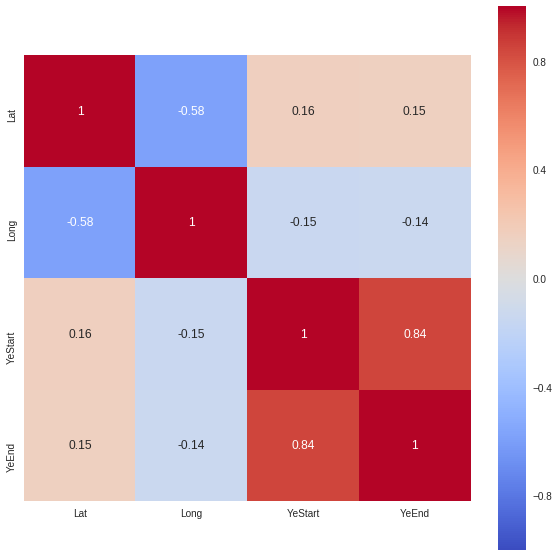

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

##scatter_matrix

In [0]:
color_dic = {'M':'red', 'B':'blue'}
colors = data['YeStart'].map(lambda x: color_dic.get(x))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


ValueError: ignored

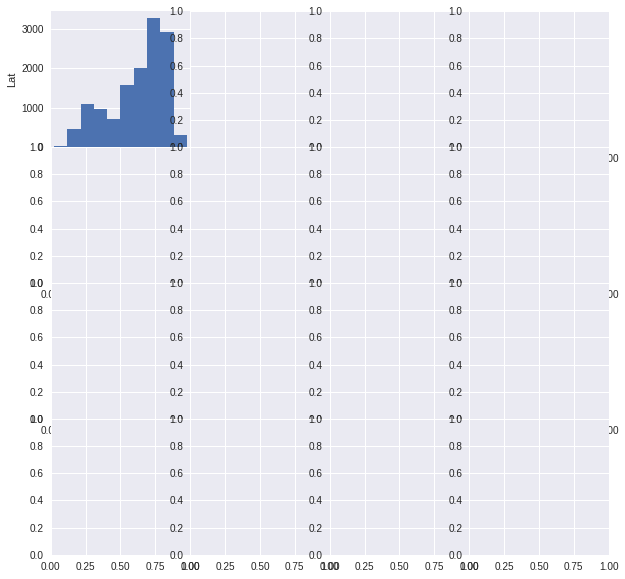

In [19]:
sm = pd.scatter_matrix(data[features_mean], c=colors, alpha=1, figsize=((10,10)));

In [0]:
plt.show()

##distplot

In [21]:
bins = 12
plt.figure(figsize=(10,10))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)

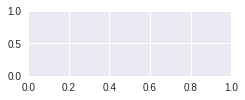

In [22]:
plt.subplot(rows, 2, i+1)

In [29]:
    sns.distplot(data[data['YeStart']=='X'][feature], bins=bins, color='red', label='X');
    sns.distplot(data[data['YeStart']=='Y'][feature], bins=bins, color='blue', label='Y');
    ConceptTemp.ix[10, 10].values 

TypeError: ignored

No handlers could be found for logger "matplotlib.legend"


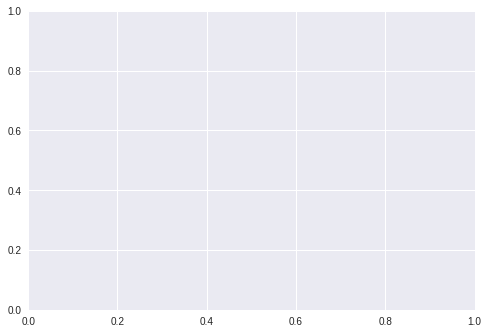

In [26]:
plt.legend(loc='upper right')

In [30]:
plt.tight_layout()
plt.show()

##boxplot

In [31]:
plt.figure(figsize=(10,10))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)

In [32]:
plt.figure(figsize=(10,10))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


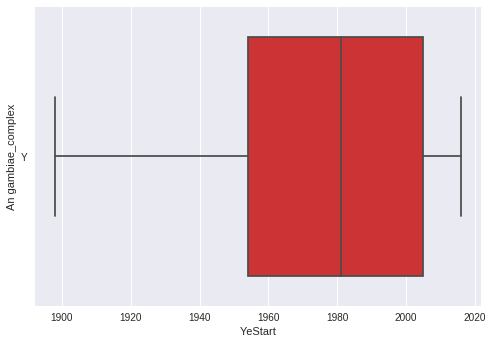

In [33]:
sns.boxplot(x='YeStart', y=feature, data=data, palette="Set1")

In [34]:
plt.tight_layout()
plt.show()

In [0]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

##ML package

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [0]:
import time

In [0]:
X = data.loc[:,features_mean]
y = data.loc[:, 'YeStart']

#Using all mean values feature

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
accuracy_all = []
cvs_all = []

##Stochastic Gradient Descent

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
start = time.time()

In [43]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


ValueError: ignored

In [0]:
end = time.time()

In [45]:
accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

NameError: ignored

In [0]:
end = time.time()

In [47]:
accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

NameError: ignored